# Optimización de Rutas

In [1]:
import numpy as np
import networkx as nx
from scipy.spatial import distance_matrix

In [2]:
def crear_grafo_mina(n_nodes, n_bloqueos=1, seed=42):
    """
    Crea un grafo geométrico donde algunos caminos están bloqueados.
    Los pesos de las aristas representan la distancia euclidiana.

    Retorna la matriz de distancias lista para el Hamiltoniano.
    """
    np.random.seed(seed)

    coords = np.random.rand(n_nodes, 2) * 100
    pos = {i: coords[i] for i in range(n_nodes)}

    dist_mat = distance_matrix(coords, coords)

    G = nx.complete_graph(n_nodes)
    nx.set_node_attributes(G, pos, "pos")

    lista_aristas = list(G.edges())
    indices_a_bloquear = np.random.choice(
        len(lista_aristas), size=n_bloqueos, replace=False
    )

    for i in indices_a_bloquear:
        u, v = lista_aristas[i]

        G.remove_edge(u, v)
        PENALTY = 9999.0
        dist_mat[u][v] = PENALTY
        dist_mat[v][u] = PENALTY

        print(f"> Bloqueo generado entre Ubicación {u} y {v}")

    for u, v in G.edges():
        G[u][v]["weight"] = dist_mat[u][v]

    return G, dist_mat, pos

In [6]:
import matplotlib.pyplot as plt

> Bloqueo generado entre Ubicación 2 y 7
> Bloqueo generado entre Ubicación 1 y 5
> Bloqueo generado entre Ubicación 3 y 4
Grafo generado con 8 ubicaciones.
Ejemplo de distancia (Nodo 0 a Nodo 1): 53.93


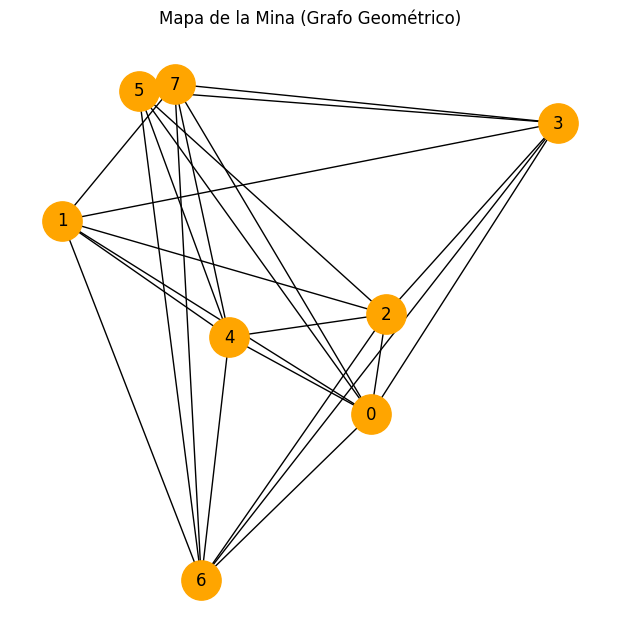

In [7]:
N = 8

G_mina, matriz_distancias, posiciones = crear_grafo_mina(
    N, n_bloqueos=3, seed=123
)

print(f"Grafo generado con {N} ubicaciones.")
print("Ejemplo de distancia (Nodo 0 a Nodo 1):", f"{matriz_distancias[0][1]:.2f}")

plt.figure(figsize=(6, 6))
nx.draw(G_mina, posiciones, with_labels=True, node_color="orange", node_size=800)
plt.title("Mapa de la Mina (Grafo Geométrico)")
plt.show()